<a href="https://colab.research.google.com/github/Uttam580/New_learning-/blob/master/task2_datagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving R. Data - 1 tab.xlsx to R. Data - 1 tab.xlsx


In [0]:
import numpy as np 
import pandas as pd

In [0]:
missing_values = ["n/a", "na", "--"]
df = pd.read_excel('R. Data - 1 tab.xlsx',na_values = missing_values)

In [4]:
any(df.isnull())

True

In [0]:
df_new = df.fillna(df.PartySize.median()) #filling null values on median in Partysize

In [6]:
df_new.isna().any()

StoreCode       False
DTS             False
Shift           False
Day Type        False
Day             False
Month           False
Date            False
Year            False
Time            False
TicketCode      False
PartySize       False
MenuCateogry    False
MenuItem        False
ItemPrice       False
ItemQty         False
dtype: bool

In [0]:
df_new.drop(['StoreCode','Year','Time','TicketCode','DTS','Day','Month','Date'],axis=1,inplace=True) #dropping unnecessary columns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


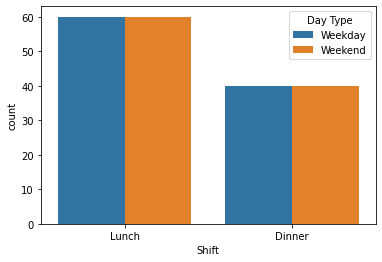

In [8]:
import seaborn as sns
sns.countplot(x='Shift',hue='Day Type',data=df_new)

In [9]:
df_weekday = df_new[df_new['Day Type']=='Weekday']#seperating weekday and weekend columns from dataset 
df_weekend = df_new[df_new['Day Type']=='Weekend']
df_weekday.shape, df_weekend.shape  # we have balnaced dataset for weekday and weekend , no need to do samplling

((100, 7), (100, 7))

In [0]:
weekday=pd.DataFrame([]) 
for i in range(129):
  weekday = weekday.append(df_weekday)

In [0]:
weekend=pd.DataFrame([]) 
for i in range(52):
  weekend = weekend.append(df_weekend)

In [12]:
weekday.shape, weekend.shape

((12900, 7), (5200, 7))

In [0]:
from datetime import datetime  # date generation based on weekday and wweekend
start = datetime(2019, 1, 1)
end = datetime(2019, 6, 30)
date_sun = pd.date_range(start, end, freq='W-SUN')
date_sat = pd.date_range(start, end, freq='W-SAT')
date_weekday = pd.date_range(start,end, freq='B')
date_weekend= date_sat.union(date_sun)

In [0]:
d = []
for j in range(100):
  for i in range(52):
    d.append(date_weekend[i])
all_weekend_date = pd.DataFrame(d,columns=['date'])

In [0]:
all_weekend_date.sort_values(by='date',inplace=True, ascending=True)

In [0]:
e = []
for j in range(100):
  for i in range(129):
    e.append(date_weekday[i])
all_week_date = pd.DataFrame(e,columns=['date'])
all_week_date.sort_values(by='date',inplace=True, ascending=True)

In [0]:
x11= weekend.reset_index(drop=True)

In [0]:
x12=all_weekend_date.reset_index(drop=True)

In [0]:
x11['date']=x12

In [0]:
x21= weekday.reset_index(drop=True)

In [0]:
x22=all_week_date.reset_index(drop=True)

In [0]:
x21['date'] = x22

In [23]:
x11,x21

(       Shift Day Type  PartySize  ... ItemPrice ItemQty       date
 0      Lunch  Weekend        3.0  ...      5.00       1 2019-01-05
 1      Lunch  Weekend        3.0  ...      5.00       1 2019-01-05
 2      Lunch  Weekend        3.0  ...     11.00       2 2019-01-05
 3      Lunch  Weekend        3.0  ...     18.00       1 2019-01-05
 4      Lunch  Weekend        3.0  ...     16.00       1 2019-01-05
 ...      ...      ...        ...  ...       ...     ...        ...
 5195  Dinner  Weekend        4.0  ...      5.00       1 2019-06-30
 5196  Dinner  Weekend        4.0  ...      2.75       1 2019-06-30
 5197  Dinner  Weekend        4.0  ...      2.75       4 2019-06-30
 5198  Dinner  Weekend        4.0  ...     16.00       2 2019-06-30
 5199  Dinner  Weekend        4.0  ...      3.50       2 2019-06-30
 
 [5200 rows x 8 columns],
         Shift Day Type  PartySize  ... ItemPrice ItemQty       date
 0       Lunch  Weekday        4.0  ...     14.00       1 2019-01-01
 1       Lunch  We

In [0]:
final = pd.concat([x11, x21], ignore_index=True)

In [0]:
final.to_csv('total_data.csv')